In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('rawdata/test2603.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Columns: 180 entries, key_0 to obv
dtypes: float64(113), int64(67)
memory usage: 3.9 MB


In [ ]:
df.drop('key_0', axis='columns', inplace=True)

In [ ]:
df.head()

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
0,13.840841,14.072165,13.725180,13.995057,18768739.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.042705e+07,NaN,18768739.0
1,14.149274,14.534812,14.149274,14.496258,35472094.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.539755,3.880459e+07,NaN,54240833.0
2,14.611919,14.650473,14.187826,14.264935,14054169.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.462647,2.943517e+07,NaN,40186664.0
3,14.264935,14.727581,14.187826,14.342042,32360884.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.539754,1.556624e+07,NaN,72547548.0
4,14.419148,15.267335,14.380595,15.113118,33785164.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.372678,NaN,0.138889,NaN,NaN,0.925293,3.759998e+07,NaN,106332712.0


In [ ]:
# target value 設為後9天 ['close'] 的股價
df['target'] = df['close'].shift(9)

In [ ]:
df.head()

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,target
0,13.840841,14.072165,13.725180,13.995057,18768739.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.042705e+07,NaN,18768739.0,NaN
1,14.149274,14.534812,14.149274,14.496258,35472094.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.539755,3.880459e+07,NaN,54240833.0,NaN
2,14.611919,14.650473,14.187826,14.264935,14054169.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.462647,2.943517e+07,NaN,40186664.0,NaN
3,14.264935,14.727581,14.187826,14.342042,32360884.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.539754,1.556624e+07,NaN,72547548.0,NaN
4,14.419148,15.267335,14.380595,15.113118,33785164.0,NaN,NaN,NaN,NaN,NaN,...,0.372678,NaN,0.138889,NaN,NaN,0.925293,3.759998e+07,NaN,106332712.0,NaN


In [ ]:
# 保留前 100 row 空值小於等於 60% 的 column
df = df[df.columns[df.iloc[:101,:].isnull().sum()/100 <= 0.6]]

In [ ]:
df[df.isnull().T.any()]

,open,high,low,close,volume,ht_dcperiod,inphase,quadrature,ht_trendmode,add,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,target
0,13.840841,14.072165,13.725180,13.995057,18768739.0,NaN,NaN,NaN,0,27.797345,...,NaN,NaN,NaN,NaN,NaN,NaN,1.042705e+07,NaN,18768739.0,NaN
1,14.149274,14.534812,14.149274,14.496258,35472094.0,NaN,NaN,NaN,0,28.684086,...,NaN,NaN,NaN,NaN,NaN,0.539755,3.880459e+07,NaN,54240833.0,NaN
2,14.611919,14.650473,14.187826,14.264935,14054169.0,NaN,NaN,NaN,0,28.838299,...,NaN,NaN,NaN,NaN,NaN,0.462647,2.943517e+07,NaN,40186664.0,NaN
3,14.264935,14.727581,14.187826,14.342042,32360884.0,NaN,NaN,NaN,0,28.915407,...,NaN,NaN,NaN,NaN,NaN,0.539754,1.556624e+07,NaN,72547548.0,NaN
4,14.419148,15.267335,14.380595,15.113118,33785164.0,NaN,NaN,NaN,0,29.647929,...,0.372678,NaN,0.138889,NaN,NaN,0.925293,3.759998e+07,NaN,106332712.0,NaN
5,15.113120,15.575766,14.958905,15.460106,34852479.0,NaN,NaN,NaN,0,30.534671,...,0.469282,NaN,0.220225,NaN,NaN,0.616861,5.938291e+07,NaN,141185191.0,NaN
6,15.537214,15.614321,15.036013,15.344444,17293123.0,NaN,NaN,NaN,0,30.650334,...,0.504217,NaN,0.254235,NaN,NaN,0.578308,6.053581e+07,NaN,123892068.0,NaN
7,15.113120,15.305889,14.727581,14.727581,10638524.0,NaN,NaN,NaN,0,30.033470,...,0.412365,NaN,0.170045,NaN,NaN,0.616863,4.989728e+07,NaN,113253544.0,NaN
8,14.727580,15.344442,14.727580,15.113118,18102563.0,NaN,NaN,NaN,0,30.072022,...,0.251045,NaN,0.063024,NaN,NaN,0.616863,5.442290e+07,NaN,131356107.0,NaN
9,15.382996,15.537213,15.190227,15.228782,24309463.0,NaN,NaN,NaN,0,30.727440,...,0.251755,NaN,0.063380,NaN,NaN,0.424095,3.551562e+07,4.867757e+06,155665570.0,13.995057


In [ ]:
# 由上看出前 58 row 有空值
# 看 58 row 以後的空值
df.iloc[58:,:].isnull().any().sum()

0

In [ ]:
# 刪除前 58 row 當新的 df
df.drop([x for x in range(58)], axis='index', inplace=True)
# index reset
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.head()

,open,high,low,close,volume,ht_dcperiod,inphase,quadrature,ht_trendmode,add,...,stddev,tsf,var,atr,natr,trange,ad,adosc,obv,target
0,14.920351,15.151675,14.843243,15.036013,11273660.0,27.530086,-0.170343,0.244272,0,29.994918,...,0.234641,14.453044,0.055056,0.358527,2.384453,0.308432,8.850410e+07,2.451942e+06,224145625.0,14.496258
1,15.036013,15.036013,14.804689,15.036013,6002749.0,26.764364,-0.231784,-0.079606,0,29.840701,...,0.262620,14.598362,0.068969,0.349441,2.324026,0.231324,9.450685e+07,5.030582e+06,224145625.0,14.804688
2,14.958905,15.036012,14.766134,14.804688,3968404.0,26.061088,-0.328288,0.248482,0,29.802146,...,0.198094,14.703856,0.039241,0.343758,2.321952,0.269879,9.167229e+07,4.726249e+06,220177221.0,14.766133
3,14.881798,14.958905,14.727581,14.804688,4367155.0,25.323136,-0.187436,0.873280,0,29.686486,...,0.107951,14.818670,0.011653,0.335727,2.267706,0.231324,9.021655e+07,3.708900e+06,220177221.0,14.727581
4,14.804688,14.997458,14.766134,14.997458,8383314.0,24.597271,0.190700,1.038541,0,29.763591,...,0.107951,14.941110,0.011653,0.328269,2.188834,0.231324,9.859986e+07,5.622958e+06,228560535.0,14.650473


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.shape[1]

171

In [ ]:
y

0        14.496258
1        14.804688
2        14.766133
3        14.727581
4        14.650473
           ...    
2753    113.500000
2754    124.000000
2755    136.000000
2756    133.500000
2757    136.500000
Name: target, Length: 2758, dtype: float64

### PCA

https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [ ]:
x_scaler

array([[-0.16244344, -0.15872932, -0.15224781, ...,  1.93937899,
         0.04115036, -0.76212904],
       [-0.15386179, -0.16689824, -0.15521867, ...,  1.94708059,
         0.08443932, -0.76212904],
       [-0.15958287, -0.16689826, -0.15818955, ...,  1.94344382,
         0.07933033, -0.76381708],
       ...,
       [11.19544299, 11.20159235, 11.6493846 , ...,  2.23681377,
         3.67465585,  7.52904966],
       [12.08579411, 11.83724022, 11.80349641, ...,  2.28723345,
         3.68916439,  7.59173531],
       [12.197088  , 12.68477071, 12.68963931, ...,  2.44714256,
         4.02545996,  7.64475168]])

In [ ]:
x_scaler

array([[-0.16244344, -0.15872932, -0.15224781, ...,  1.93937899,
         0.04115036, -0.76212904],
       [-0.15386179, -0.16689824, -0.15521867, ...,  1.94708059,
         0.08443932, -0.76212904],
       [-0.15958287, -0.16689826, -0.15818955, ...,  1.94344382,
         0.07933033, -0.76381708],
       ...,
       [11.19544299, 11.20159235, 11.6493846 , ...,  2.23681377,
         3.67465585,  7.52904966],
       [12.08579411, 11.83724022, 11.80349641, ...,  2.28723345,
         3.68916439,  7.59173531],
       [12.197088  , 12.68477071, 12.68963931, ...,  2.44714256,
         4.02545996,  7.64475168]])

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(x_scaler)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

In [ ]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [ ]:
most_important

[163,
 73,
 14,
 41,
 128,
 128,
 35,
 31,
 35,
 108,
 125,
 116,
 134,
 110,
 134,
 123,
 123,
 113,
 143,
 34,
 119,
 143,
 119,
 139,
 120,
 7,
 127,
 91,
 122,
 136,
 94,
 151,
 148,
 92,
 92,
 105,
 105,
 138,
 146,
 131,
 94,
 138,
 147,
 147,
 139,
 127,
 131,
 156,
 121,
 33,
 119,
 30,
 93,
 107,
 140,
 115,
 99,
 143,
 8,
 113,
 8,
 100,
 157,
 6,
 123,
 111,
 157,
 111,
 134,
 86,
 86,
 38,
 116,
 129,
 169,
 164,
 166,
 164,
 102,
 54,
 118,
 54,
 73,
 137,
 41,
 58,
 41,
 55,
 60,
 168,
 67,
 35,
 35,
 159,
 168,
 73,
 168,
 68,
 162,
 56,
 57,
 128,
 170,
 20,
 161,
 85,
 19,
 13,
 161,
 27,
 16,
 81,
 0,
 79,
 0,
 165,
 165,
 84,
 18,
 83,
 84,
 83,
 76,
 77,
 77,
 77,
 89,
 32,
 88,
 78,
 53,
 90,
 46,
 152,
 40,
 9,
 62,
 62,
 61,
 63,
 63,
 15,
 9,
 12,
 75,
 2,
 74,
 1,
 49,
 154,
 76,
 98,
 98,
 98,
 21,
 126,
 126,
 37,
 158,
 31,
 108,
 101,
 103,
 163,
 163,
 80,
 96,
 132,
 149,
 150,
 74]

In [ ]:
colOfx = list(x.columns)

In [ ]:
most_important_names = [colOfx[most_important[i]] for i in range(n_pcs)]

In [ ]:
most_important_names

['tsf',
 'willr',
 'minindex',
 'bop',
 'cdllongleggeddoji',
 'cdllongleggeddoji',
 'adx',
 'sinh',
 'adx',
 'cdldragonflydoji',
 'cdlkicking',
 'cdlharami',
 'cdlmorningstar',
 'cdleveningdojistar',
 'cdlmorningstar',
 'cdlinneck',
 'cdlinneck',
 'cdlgravestonedoji',
 'cdlstalledpattern',
 'tanh',
 'cdlhikkake',
 'cdlstalledpattern',
 'cdlhikkake',
 'cdlseparatinglines',
 'cdlhikkakemod',
 'quadrature',
 'cdlladderbottom',
 'cdl2crows',
 'cdlidentical3crows',
 'cdlpiercing',
 'cdl3linestrike',
 'cdlxsidegap3methods',
 'cdltristar',
 'cdl3blackcrows',
 'cdl3blackcrows',
 'cdldarkcloudcover',
 'cdldarkcloudcover',
 'cdlrisefall3methods',
 'cdltasukigap',
 'cdlmatchinglow',
 'cdl3linestrike',
 'cdlrisefall3methods',
 'cdlthrusting',
 'cdlthrusting',
 'cdlseparatinglines',
 'cdlladderbottom',
 'cdlmatchinglow',
 'beta',
 'cdlhomingpigeon',
 'tan',
 'cdlhikkake',
 'sin',
 'cdl3inside',
 'cdldojistar',
 'cdlshootingstar',
 'cdlhangingman',
 'cdladvanceblock',
 'cdlstalledpattern',
 'ht_tren

In [ ]:
len(most_important_names)

171

### Other PCA method

In [ ]:
from pca import pca

In [ ]:
df_scaler = pd.DataFrame(x_scaler, columns=x.columns)

In [ ]:
pcaModel = pca(n_components=x.shape[1])
x_pcaModelResults = pcaModel.fit_transform(df_scaler)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [171] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[171]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [ ]:
x_pcaModelResults['topfeat']['feature'].values

array(['tsf', 'willr', 'minindex', 'bop', 'cdllongleggeddoji',
       'cdllongleggeddoji', 'adx', 'sinh', 'adx', 'cdldragonflydoji',
       'cdlkicking', 'cdlharami', 'cdlmorningstar', 'cdleveningdojistar',
       'cdlmorningstar', 'cdlinneck', 'cdlinneck', 'cdlgravestonedoji',
       'cdlstalledpattern', 'tanh', 'cdlhikkake', 'cdlstalledpattern',
       'cdlhikkake', 'cdlseparatinglines', 'cdlhikkakemod', 'quadrature',
       'cdlladderbottom', 'cdl2crows', 'cdlidentical3crows',
       'cdlpiercing', 'cdl3linestrike', 'cdlxsidegap3methods',
       'cdltristar', 'cdl3blackcrows', 'cdl3blackcrows',
       'cdldarkcloudcover', 'cdldarkcloudcover', 'cdlrisefall3methods',
       'cdltasukigap', 'cdlmatchinglow', 'cdl3linestrike',
       'cdlrisefall3methods', 'cdlthrusting', 'cdlthrusting',
       'cdlseparatinglines', 'cdlladderbottom', 'cdlmatchinglow', 'beta',
       'cdlhomingpigeon', 'tan', 'cdlhikkake', 'sin', 'cdl3inside',
       'cdldojistar', 'cdlshootingstar', 'cdlhangingman',
  

In [ ]:
x_pcaModelResults['topfeat'].head(10)

,PC,feature,loading,type
0,PC1,tsf,0.128870,best
1,PC2,willr,-0.229046,best
2,PC3,minindex,0.390156,best
3,PC4,bop,0.278025,best
4,PC5,cdllongleggeddoji,0.242941,best
5,PC6,cdllongleggeddoji,-0.392429,best
6,PC7,adx,0.287334,best
7,PC8,sinh,0.400604,best
8,PC9,adx,-0.272155,best
9,PC10,cdldragonflydoji,0.561930,best


In [ ]:
x_pcaModelResults['topfeat'][x_pcaModelResults['topfeat']['type'] == 'best']

,PC,feature,loading,type
0,PC1,tsf,0.128870,best
1,PC2,willr,-0.229046,best
2,PC3,minindex,0.390156,best
3,PC4,bop,0.278025,best
4,PC5,cdllongleggeddoji,0.242941,best
...,...,...,...,...
166,PC167,cdl3starsinsouth,-0.793474,best
167,PC168,cdlmathold,1.000000,best
168,PC169,cdlunique3river,0.862499,best
169,PC170,cdlupsidegap2crows,-0.862499,best


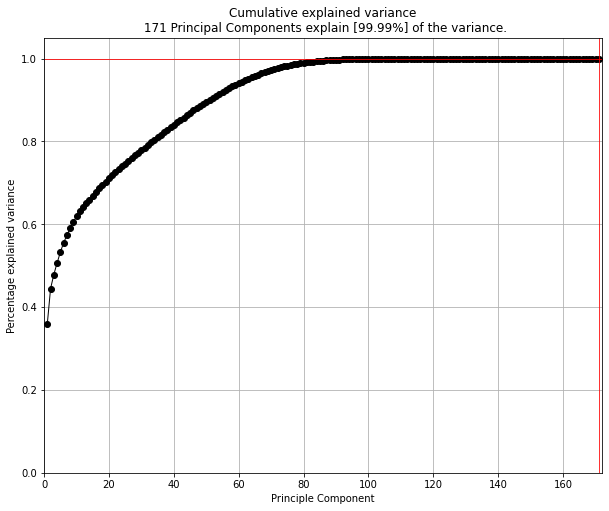

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = pcaModel.plot()